## Sallow Neutal Net with dropout

- adding more layers 
- adding dropout layers

In [1]:
import numpy as np;
np.random.seed(42)

In [3]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import SGD
from keras import layers
import matplotlib.pyplot as plt

%matplotlib inline

## Load data

In [4]:
(X_train, y_train),(X_test,y_test) = mnist.load_data()

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_test.shape

(10000, 28, 28)

### Sample Training Images

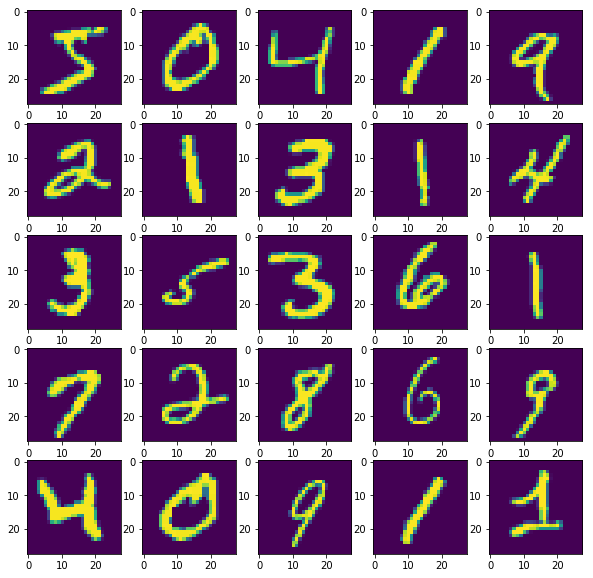

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i])

### Sample Test images

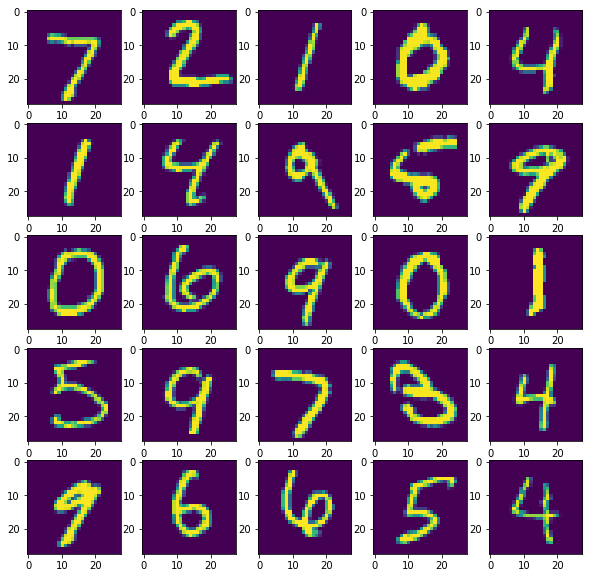

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_test[i])

## PreProcess data

In [9]:
X_train = X_train.reshape(60000,784)

In [10]:
X_test = X_test.reshape(10000,784)

In [11]:
X_train.shape

(60000, 784)

In [12]:
X_test.shape

(10000, 784)

In [13]:
X_train = X_train/255

In [14]:
X_test = X_test/255

In [15]:
n_categories = 10
y_train = keras.utils.to_categorical(y_train, n_categories)
y_test = keras.utils.to_categorical(y_test, n_categories)

In [16]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

##### **Design Model

In [17]:
dropout = 0.5
model = Sequential()
model.add(layers.Dense(64,activation='tanh',input_shape = (784,)))
model.add(layers.Dropout(dropout))
model.add(layers.Dense(64,activation='tanh'))
model.add(layers.Dropout(dropout))
model.add(layers.Dense(10,activation='softmax'))

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


**Configure Model**

In [19]:
model.compile(optimizer=SGD(lr=0.05),loss='categorical_crossentropy',metrics = ['accuracy'])

**Train Model**

In [20]:
model.fit(X_train,y_train,batch_size = 128, epochs=100, validation_data=(X_test,y_test),verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 1s 18us/step - loss: 0.8750 - acc: 0.7271 - val_loss: 0.3605 - val_acc: 0.9005
Epoch 2/100
60000/60000 [==============================] - 1s 15us/step - loss: 0.5433 - acc: 0.8370 - val_loss: 0.3136 - val_acc: 0.9081
Epoch 3/100
60000/60000 [==============================] - 1s 18us/step - loss: 0.4873 - acc: 0.8550 - val_loss: 0.2922 - val_acc: 0.9171
Epoch 4/100
60000/60000 [==============================] - 1s 20us/step - loss: 0.4557 - acc: 0.8661 - val_loss: 0.2824 - val_acc: 0.9180
Epoch 5/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.4363 - acc: 0.8730 - val_loss: 0.2722 - val_acc: 0.9189
Epoch 6/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.4202 - acc: 0.8764 - val_loss: 0.2687 - val_acc: 0.9214
Epoch 7/100
60000/60000 [==============================] - 1s 15us/step - loss: 0.4109 - acc: 0.8801 - val_loss: 0.2603 - 

60000/60000 [==============================] - 1s 13us/step - loss: 0.2778 - acc: 0.9199 - val_loss: 0.1805 - val_acc: 0.9457
Epoch 60/100
60000/60000 [==============================] - 1s 14us/step - loss: 0.2748 - acc: 0.9198 - val_loss: 0.1814 - val_acc: 0.9454
Epoch 61/100
60000/60000 [==============================] - 1s 12us/step - loss: 0.2774 - acc: 0.9192 - val_loss: 0.1804 - val_acc: 0.9462
Epoch 62/100
60000/60000 [==============================] - 1s 13us/step - loss: 0.2738 - acc: 0.9200 - val_loss: 0.1812 - val_acc: 0.9455
Epoch 63/100
60000/60000 [==============================] - 1s 13us/step - loss: 0.2751 - acc: 0.9201 - val_loss: 0.1795 - val_acc: 0.9468
Epoch 64/100
60000/60000 [==============================] - 1s 19us/step - loss: 0.2727 - acc: 0.9207 - val_loss: 0.1790 - val_acc: 0.9472
Epoch 65/100
60000/60000 [==============================] - 1s 22us/step - loss: 0.2734 - acc: 0.9208 - val_loss: 0.1786 - val_acc: 0.9467
Epoch 66/100
60000/60000 [==============

In [21]:
score = model.evaluate(X_test, y_test, batch_size=128)
score_train = model.evaluate(X_train, y_train, batch_size=128)

60000/60000 [==============================] - 1s 8us/step


In [22]:
print('Test Accuracy of the model :\t{}'.format(score[1]))
print('Train Accuracy of the model :\t{}'.format(score_train[1]))

Test Accuracy of the model :	0.9513
Train Accuracy of the model :	0.9588833333651224


Looks pretty good. Training and test score is very close.